# Data and Uncertainty

- In probability, underlying processes are represented by a __model__ (often some distribution)   
    e.g., flipping a coin, rolling a dice, etc.
    
- In reality, even for very simple processes, underlying process is not easily described   
    e.g., what is the true $p$ of a coin? pmf of a dice?,
    
- Many real-world processes are much more complicated; however, we still try  
    > _Now it would be very remarkable if any system existing in the real world could be 
    exactly represented by any simple model. However, cunningly chosen parsimonious models 
    often do provide remarkably useful approximations. 
    [... example of modeling gas in physics ...]  
    For such a model there is no need to ask the question "Is the model true?". 
    If "truth" is to be the "whole truth" the answer must be "No". 
    The only question of interest is "Is the model illuminating and useful?"._  
    George Box

- If you build a model with random variables having known distributions, we can simulate the outcomes

- If the model is accurate to some degree, we can say a lot about the outcome: i.e., the model is useful

- However, often building models from ground up is practically impossible
    e.g., where do you begin to build a model for NCAA tournament? human behavior?

- Often we are interested in inference and/or prediction

    - __Inference__: making conclusions based on data  
        e.g., parameters such as winning probability for each team

    - __Prediction__: making guesses about the next outcome  
        e.g., who will win?
        
- Monte Carlo simulation is a good tool to illustrate the relationship between the generating process and data

## Monte Carlo simulation

First, recall the definition of a random sample:

> __Random sample__: Let $X_1,X_2,\dots,X_n$ be a set of $n$ independent random variables, 
all having the _same pdf_, $f_X$. Then $X_1,X_2,\dots,X_n$ are said to be a _random sample of size n_.

- Random sample: $X_1,X_2,\dots,X_n$

- Random measurements: $x_1,x_2,\dots,x_n$

While random sample is made up of random variables,
__iid observations__ (independent identically distributed)
$x_1, x_2,\dots x_n$ are $n$-measurements (numbers) coming from $X_1,X_2,\dots,X_n$

- In order to capture randomness of _random sample_ with _iid observations_, 
    we can generate many sets of random measurements   
    $$
    x_1^{(1)},x_2^{(1)},\dots,x_n^{(1)}\\
    x_1^{(2)},x_2^{(2)},\dots,x_n^{(2)}\\
    \vdots\\
    x_1^{(S)},x_2^{(S)},\dots,x_n^{(S)}
    $$

- As an example, let's simulate convergence of the sample mean to the true mean

### Consistency of the sample mean: dice example

Suppose that $X_1,X_2,\dots,X_n$ is a random sample of size $n$ from a discrete pdf $p_X(k;\mu)$, where $E(X)=\mu$ and $\text{Var}(X) = \sigma^2 < \infty$. Let $\hat\mu_n = \frac{1}{n}\sum_i^n X_i$. Is $\hat\mu_n$ a consistent estimator for $\mu$?

Since we are simulating dice throw with a pmf, the _model_ is perfect. Hence, we know the true value of $E(X)=\mu=3.5$ and $\text{Var}(X) = \sigma^2 = 2.917$. Also, sampling distribution says $E(\hat\mu_n)=\mu$ and $$\text{Var}(\hat\mu_n) = \text{Var}\left(\frac{1}{n}\sum_{i=1}^n X_i \right) = \frac{1}{n^2} \sum_{i=1}^n \text{Var}(X_i)= \frac{\sigma^2}{n}$$. We will verify this empirically.

First, generate many random observations $(x_1^{(s)},x_2^{(s)},\dots ,x_n^{(s)})$ 
for $s=1,2,\dots, 100$ and $n=50$. Each simulation is the _data_ of 50 dice throws.
Put them into a numpy array

In [1]:
import numpy as np
import pandas as pd

n = 7
S = 10

x = np.random.randint(size=(S, n), low=1, high=7)
print("shape of x:", x.shape)
print("unique values in x:", np.unique(x))

shape of x: (10, 7)
unique values in x: [1 2 3 4 5 6]


In `x`, one set of observations is one row. Get one row by indexing into `x`. First index is for the row:

In [2]:
x

array([[6, 4, 3, 2, 2, 3, 4],
       [5, 6, 2, 5, 3, 2, 5],
       [4, 4, 2, 2, 4, 4, 6],
       [6, 3, 6, 3, 6, 6, 3],
       [1, 1, 3, 5, 4, 4, 4],
       [4, 1, 6, 2, 1, 6, 3],
       [3, 4, 6, 5, 4, 1, 4],
       [5, 5, 5, 6, 6, 5, 2],
       [5, 4, 4, 4, 6, 4, 1],
       [2, 2, 4, 3, 4, 6, 3]])

In [3]:
print("one row:", x[0])    
print("one value:", x[0, 4])

one row: [6 4 3 2 2 3 4]
one value: 2


In [4]:
print("one row:", x[-1])
print("one value:", x[-1, -1])

one row: [2 2 4 3 4 6 3]
one value: 3


Numpy offers many convenient and flexible ways to slice and get a subset of numpy arrays (Chapter 2 in Vanderplas). In particular, [_views_ of arrays](https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html#Subarrays-as-no-copy-views) are useful. This is in contrast to R that always creates copies (even in function calls).

Numpy makes array operations simple. For example, we can't use add a value to the list:

In [5]:
## [1,2,3]+3  ## causes error

In addition to common arithmetic functions (called ufuncs) other useful functions are:

In [6]:
np.multiply.outer(x[0],x[1]) ## outer product of first two rows

array([[30, 36, 12, 30, 18, 12, 30],
       [20, 24,  8, 20, 12,  8, 20],
       [15, 18,  6, 15,  9,  6, 15],
       [10, 12,  4, 10,  6,  4, 10],
       [10, 12,  4, 10,  6,  4, 10],
       [15, 18,  6, 15,  9,  6, 15],
       [20, 24,  8, 20, 12,  8, 20]])

In [7]:
np.add.outer(x[:,0],x[:,1]) ## outer sum of first two columns

array([[10, 12, 10,  9,  7,  7, 10, 11, 10,  8],
       [ 9, 11,  9,  8,  6,  6,  9, 10,  9,  7],
       [ 8, 10,  8,  7,  5,  5,  8,  9,  8,  6],
       [10, 12, 10,  9,  7,  7, 10, 11, 10,  8],
       [ 5,  7,  5,  4,  2,  2,  5,  6,  5,  3],
       [ 8, 10,  8,  7,  5,  5,  8,  9,  8,  6],
       [ 7,  9,  7,  6,  4,  4,  7,  8,  7,  5],
       [ 9, 11,  9,  8,  6,  6,  9, 10,  9,  7],
       [ 9, 11,  9,  8,  6,  6,  9, 10,  9,  7],
       [ 6,  8,  6,  5,  3,  3,  6,  7,  6,  4]])

Note that sample mean of one set of random observations can be computed by:

In [8]:
print("object method:", x[0].mean(), "function:", np.mean(x[0]))

object method: 3.42857142857 function: 3.42857142857


Internally, they are equivalent.

In [9]:
x0 = x[0]
## x0.mean??
## np.mean??

Mean of one row of `x` is sample mean of one simulation: i.e., mean of 50 dice throws. 
How do you compute mean of each simulation? Numpy `axis` refers to the direction of the array. 

Giving argument `axis=0`, the mean function computes column averages.

In [10]:
temp = x.mean(axis=0)
print("x.mean(axis=0)   :", temp)
print("temp.mean(0)[3]  :", temp[3])
print("temp[:,3].mean() :", x[:,3].mean())

x.mean(axis=0)   : [ 4.1  3.4  4.1  3.7  4.   4.1  3.5]
temp.mean(0)[3]  : 3.7
temp[:,3].mean() : 3.7


Giving argument `axis=1`, the mean function computes row averages.

In [11]:
xmean = x.mean(axis=1)
print("xmean:", xmean)

xmean: [ 3.42857143  4.          3.71428571  4.71428571  3.14285714  3.28571429
  3.85714286  4.85714286  4.          3.42857143]


Note that `xmean` contains many observations of the sample mean $\hat\mu_n$. Plot the histogram of `xmean`:

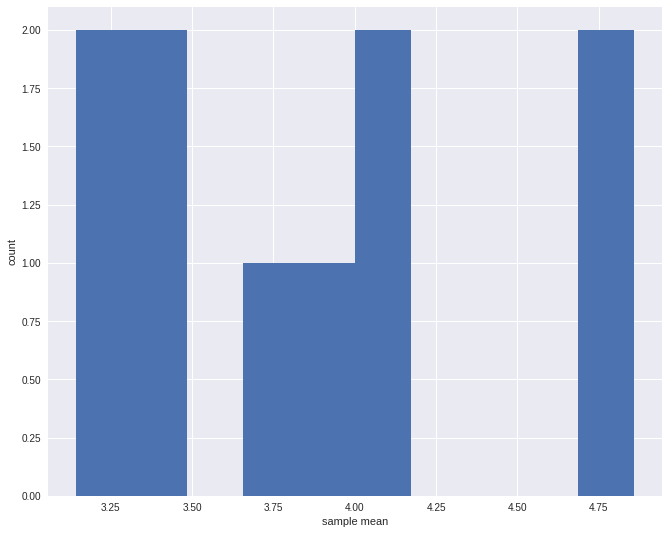

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
from IPython.core.pylabtools import figsize
figsize(11, 9)
plt.hist(xmean);
plt.xlabel('sample mean');
plt.ylabel('count');

## Effect of Sample Size $n$

Chebyshev's inequality says that 
$$ \Pr(|\hat\mu_n - \mu| < \epsilon) > 1 - \frac{\text{Var}(\hat\mu_n)}{\epsilon^2} 
= 1- \frac{\sigma^2}{n\epsilon^2} $$

Recall that $\sigma^2=2.917$ is the variance of outcomes of dice represented as a random variable. 
Fixing the error to $\epsilon = 1$ makes the RHS a function of $n$.

In order to empirically verify Chebyshev's inequality, we will simulate the dice with a function.

In [13]:
## throw dice
def throw_dice(n=1):
    
    from numpy.random import randint
    
    return(randint(size=n, low=1, high=7))

## throw dice n times, compute mean
def muhat_n(n=1):
    
    return(throw_dice(n).mean())

Above functions return numpy arrays. We will compile results below in a bare list. Then create Pandas data frame from it (more on Pandas later). Some automatic type conversion is possible, but more strict than R.

In [50]:
n_choices = np.arange(20, 10001, 10)

results = []
for n in n_choices:
    results += [muhat_n(n)] ## appends to list

df = pd.DataFrame({
    'n_throws': n_choices,
    'muhat_n' : results,
})
df[:10]

,muhat_n,n_throws
0,3.600000,20
1,3.366667,30
2,3.100000,40
3,3.620000,50
4,3.366667,60
5,3.242857,70
6,3.662500,80
7,3.622222,90
8,3.410000,100
9,3.363636,110


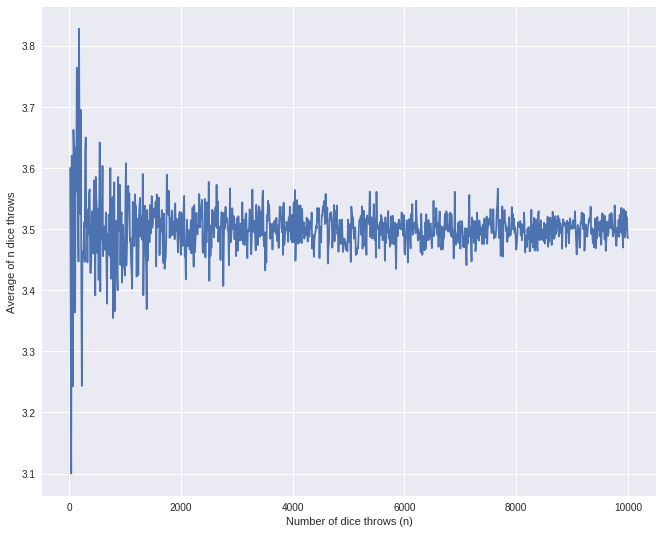

In [51]:
figsize(11, 9)
plt.plot(df['n_throws'], df['muhat_n']);
plt.xlabel("Number of dice throws (n)");
plt.ylabel("Average of n dice throws");

We can build on the result by showing where 95% bound according to Chebyshev's inequality.

If we choose $\epsilon = 1$ and $n$ is fixed at 50. Then, plugging in $\sigma^2$, we get:
$$ 
1- \frac{2.917}{n\cdot \epsilon^2} = 0.95\\
\epsilon = \sqrt{\frac{2.917}{0.05\cdot n}}$$

Following computes error threshold $epsilon$ guaranteed by Chebyshev's threshold.

In [52]:
epsilon_n = np.sqrt(2.917/(0.05*n_choices))
df['epsilon'] = epsilon_n

Plot the new plot
$$ \Pr(|\hat\mu_n - \mu| < \epsilon) > 0.95\\
\Pr(-\epsilon_n < \hat\mu_n - \mu < \epsilon_n)  > 0.95 $$

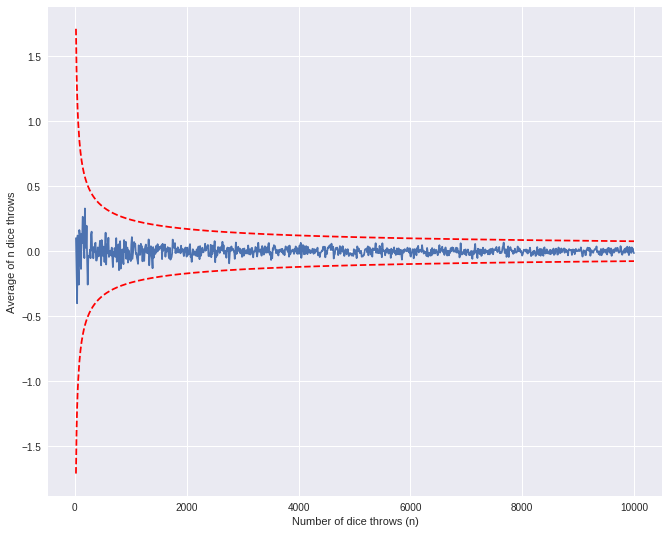

In [53]:
figsize(11, 9)
plt.plot((df['n_throws']),  df['muhat_n']-3.5);    ## subtract true mean 3.5
plt.plot((df['n_throws']),  df['epsilon'], '--r');
plt.plot((df['n_throws']), -df['epsilon'], '--r');
plt.xlabel("Number of dice throws (n)");
plt.ylabel("Average of n dice throws");

In [54]:
## repeat computing mean of n throws s times
def repeat_muhat_n(n=1, s=100):
    
    out = [muhat_n(n) for one in range(s)]
    
    return({ 'min': min(out), 'max': max(out), 'mean': sum(out)/s})

In [55]:
repeat_muhat_n(10)

{'max': 4.9000000000000004,
 'mean': 3.5509999999999997,
 'min': 2.2000000000000002}

In [56]:
results = []
for n in n_choices:
    results += [repeat_muhat_n(n)] ## appends to list

df_new = pd.DataFrame(results)
df_new['n_throws'] = n_choices
df_new['epsilon'] = epsilon_n
df_new[:10]

,max,mean,min,n_throws,epsilon
0,4.450000,3.491000,2.600000,20,1.707923
1,4.433333,3.456667,2.533333,30,1.394513
2,4.375000,3.524500,2.750000,40,1.207684
3,4.080000,3.509200,3.040000,50,1.080185
4,4.100000,3.515167,2.816667,60,0.986070
5,3.871429,3.486143,2.942857,70,0.912923
6,4.000000,3.481375,3.050000,80,0.853961
7,4.077778,3.511778,3.122222,90,0.805122
8,3.980000,3.506300,3.060000,100,0.763806
9,3.836364,3.500000,3.127273,110,0.728261


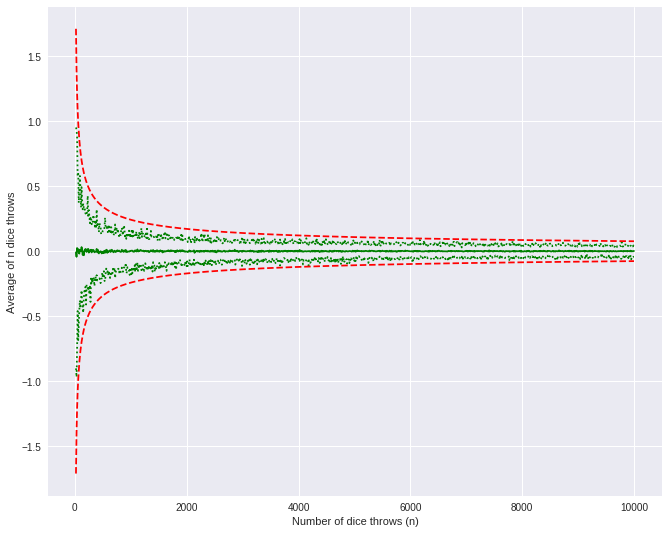

In [63]:
figsize(11, 9)
plt.plot((df_new['n_throws']),  df_new['mean']-3.5, '-g');    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['min'] -3.5, ':g');    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['max'] -3.5, ':g');    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['epsilon'], '--r');
plt.plot((df_new['n_throws']), -df_new['epsilon'], '--r');
plt.xlabel("Number of dice throws (n)");
plt.ylabel("Average of n dice throws");